# PRAVEER SAXENA BATCH NO. 1814

# BINARY CLASSIFICATION USING CONVOLUTIONAL NEURAL NETWORK

# DOGS VS CATS

1. I have created a dataset folder which in turn contains two  sub folders names as training_set and test_set
2. The training and test folders itself contains two subfolders names as dogs and cats
3. The trainins set contains 4000 images of dogs and 4000 images of cats
4. The test set contains 1000 images of dogs and 1000 images of cats


In [1]:
#Let us confirm the number of images in traing and test set
import glob
myPath_td = 'E:\\DataTrained\\Convolutional Neural Networks\\dataset/training_set/dogs/'
dog_images_train = len(glob.glob1(myPath_td,"*.jpg"))
print('The number of dog images in training_set is : ',dog_images_train)
myPath_tc = 'E:\\DataTrained\\Convolutional Neural Networks\\dataset/training_set/cats/'
cat_images_train = len(glob.glob1(myPath_tc,"*.jpg"))
print('The number of cat images in training_set is : ',cat_images_train)
myPath_tdt = 'E:\\DataTrained\\Convolutional Neural Networks\\dataset/test_set/dogs/'
dog_images_test = len(glob.glob1(myPath_tdt,"*.jpg"))
print('The number of dog images in test_set is : ',dog_images_test)
myPath_tct = 'E:\\DataTrained\\Convolutional Neural Networks\\dataset/test_set/cats/'
cat_images_test = len(glob.glob1(myPath_tct,"*.jpg"))
print('The number of cat images in test_set is : ',cat_images_test)

The number of dog images in training_set is :  4000
The number of cat images in training_set is :  4000
The number of dog images in test_set is :  1000
The number of cat images in test_set is :  1000


In [2]:
#Import the required libraries
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot
from matplotlib.image import imread
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout



Using TensorFlow backend.


Let us visualize images of dogs numbered from 1 to 9 in training data set

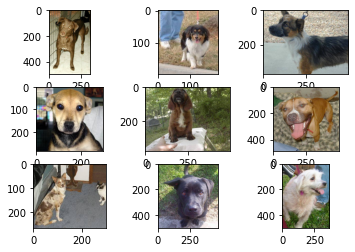

In [3]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\dataset/training_set/dogs/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Findings: We can see that the different images have different resolution/sizes, we need to normalize them

Now Let us visualize images of cats numbered from 1 to 9 in training data set

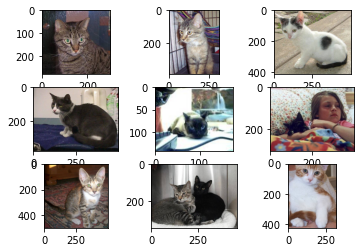

In [4]:
# plot cats photos from the dogs vs cats dataset
# define location of dataset
folder = 'E:\\DataTrained\\Convolutional Neural Networks\\dataset/training_set/cats/'
# plot first few images
for i in range(1,10):
	# define subplot
	pyplot.subplot(330 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

# Findings: We can see that the different images have different resolution/sizes, we need to normalize them¶

# Image Augmentation and scaling

1. Now we need to do image augmentation to effectively create more images from these exisiting training data  and prevent overfitting and also scale the images.
2. Also converting all images to have one size i.e (64,64)

In [5]:
# we are creating all images to have one size i.e. (64,64)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('E:\\DataTrained\\Convolutional Neural Networks\\dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [6]:
 #Applying scaling on test data
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('E:\\DataTrained\\Convolutional Neural Networks\\dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# Creation of Convolution neural Network

In [7]:
#Instantiating the Sequential class
model = Sequential()

# Adding 1st convolutional layer for feature extraction
model.add(Conv2D(filters=32,kernel_size=3, padding ='same', activation='relu',input_shape= (64,64,3)))

#Adding Maxpooling for downsampling
model.add(MaxPool2D(pool_size=(2,2),strides=2))

#Adding 2nd Convolutional layer for feature extraction
model.add(Conv2D(filters=64,kernel_size=3,padding ='same', activation='relu'))

#Adding Maxpooling for  downsampling
model.add(MaxPool2D(pool_size=(2,2),strides=2))

# Flatting the output of pooling layer
model.add(Flatten())

# Adding dropout to deactivate few neurons so that overfitting can be avoided
model.add(Dropout(0.3))

# Adding fully connected layer
model.add(Dense(units=64,activation='relu'))

#Further adding the dropout to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

# Compiling the created MODEL

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training on Training data and testing on test data

In [10]:
model.fit(x=training_set,validation_data=test_set,epochs=20)

Epoch 1/20
250/250 [==============================] - 205s 819ms/step - loss: 0.6729 - accuracy: 0.5820 - val_loss: 0.6681 - val_accuracy: 0.6555
Epoch 2/20
250/250 [==============================] - 56s 224ms/step - loss: 0.6111 - accuracy: 0.6694 - val_loss: 0.7735 - val_accuracy: 0.6925
Epoch 3/20
250/250 [==============================] - 54s 218ms/step - loss: 0.5876 - accuracy: 0.6931 - val_loss: 0.5971 - val_accuracy: 0.7095
Epoch 4/20
250/250 [==============================] - 54s 218ms/step - loss: 0.5712 - accuracy: 0.7070 - val_loss: 0.4223 - val_accuracy: 0.7160
Epoch 5/20
250/250 [==============================] - 56s 224ms/step - loss: 0.5500 - accuracy: 0.7274 - val_loss: 0.7197 - val_accuracy: 0.7520
Epoch 6/20
250/250 [==============================] - 55s 218ms/step - loss: 0.5256 - accuracy: 0.7429 - val_loss: 0.4052 - val_accuracy: 0.7645
Epoch 7/20
250/250 [==============================] - 55s 219ms/step - loss: 0.5140 - accuracy: 0.7479 - val_loss: 0.6977 - val_a

# We are getting a test accuracy of arround 82%  and training accuracy of around 81% although it can be further tested the  by increasing the number of epoch

# Making a Prediction

In [28]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('E:\\DataTrained\\Convolutional Neural Networks\\dataset/single_prediction/testing.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print('The predicted image is: ', prediction)

The predicted image is:  cat


# Saving the Model for later use

In [29]:
# Both the archtitecture of the model and  learned weights will be saved
model.save('mymodel.h5')

# Lets check the saved model by loading it

In [30]:
from keras.models import load_model
test_model = load_model('mymodel.h5')
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

# Testing an image using loaded model

In [31]:
test_image = image.load_img('E:\\DataTrained\\Convolutional Neural Networks\\dataset/single_prediction/testing.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = test_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print('The predicted image is: ', prediction)

The predicted image is:  cat
